In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
from anomaly.utils import specobjid_to_idx

In [8]:
# load data
user = "/home/edgar/"
work = f"{user}/sdss"
data_directory = f"{user}/spectra/0_01_z_0_5_4_0_snr_inf"
spectra = np.load(f"{data_directory}/spectra.npy", mmap_mode="r")
wave = np.load(f"{data_directory}/wave.npy")
idx_specobjid = np.load(f"{data_directory}/ids_inputting.npy")

In [9]:
# load metadata
sdss_df = pd.read_csv(
    f"{data_directory}/drop_0_01_z_0_5_4_0_snr_inf.csv.gz",
    index_col="specobjid",
)
sdss_df.shape

(724851, 21)

count    724851.000000
mean         14.709496
std           7.034626
min           4.000678
25%           9.975084
50%          13.175450
75%          17.569555
max          98.104000
Name: snMedian, dtype: float64

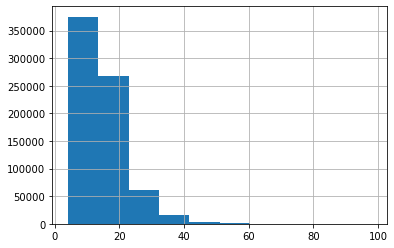

In [10]:
sdss_df["snMedian"].hist()

sdss_df["snMedian"].describe()

Explore spectra with small median SNR

In [11]:
sdss_df.sort_values(by=["snMedian"], inplace=True)

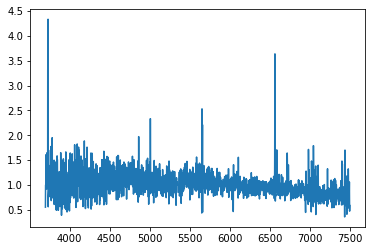

In [12]:
idx_spectrum = specobjid_to_idx(sdss_df.index[0], idx_specobjid)
plt.plot(wave, spectra[idx_spectrum])

In [13]:
# number of spectra according to a SNR threshold
mask_large_snr = sdss_df["snMedian"].values > 25
np.sum(mask_large_snr)

59372

count    665479.000000
mean         13.180727
std           4.628262
min           4.000678
25%           9.698583
50%          12.635040
75%          16.194910
max          24.999860
Name: snMedian, dtype: float64

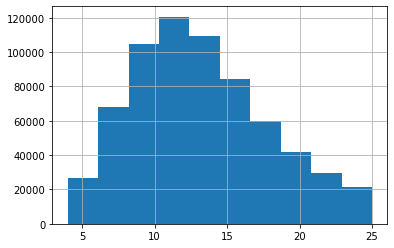

In [14]:
sdss_df.loc[~mask_large_snr, "snMedian"].hist()
sdss_df.loc[~mask_large_snr, "snMedian"].describe()

In [33]:
df = sdss_df.loc[~mask_large_snr].copy()

In [41]:
# explore stats of new bins
n_spectra = 150_000
n_bin = 4
df.iloc[n_bin*n_spectra:(n_bin+1)*n_spectra]["snMedian"].describe()

count    529.000000
mean      19.986122
std        0.007647
min       19.973590
25%       19.979370
50%       19.985640
75%       19.992880
max       19.999880
Name: snMedian, dtype: float64

Explore old SNR bin selection

count    144827.000000
mean         25.728195
std           6.720707
min          18.993350
25%          20.872250
50%          23.618510
75%          28.422095
max          90.919050
Name: snMedian, dtype: float64

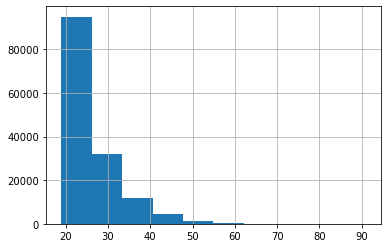

In [53]:
specobjid_04 = np.load(
    f"{data_directory}/bin_04/bin_04_index_specobjid.npy"
)
sdss_df.loc[specobjid_04[:, 1], "snMedian"].hist()
sdss_df.loc[specobjid_04[:, 1], "snMedian"].describe()

In [54]:
mask_large_snr_04 = sdss_df.loc[specobjid_04[:, 1], "snMedian"].values > 28
np.sum(mask_large_snr_04)

38502

In [55]:
sdss_df.loc[specobjid_04[:, 1], "snMedian"]

specobjid
1386119995116775424    18.99335
2420774760452483072    18.99341
1089965158534506496    18.99348
837832845933176832     18.99357
1788018162252408832    18.99363
                         ...   
1874773753037088768    89.63552
1874695412833609728    89.71014
1874775677182437376    90.41394
1874654181147568128    90.70859
1874776226938251264    90.91905
Name: snMedian, Length: 144827, dtype: float64

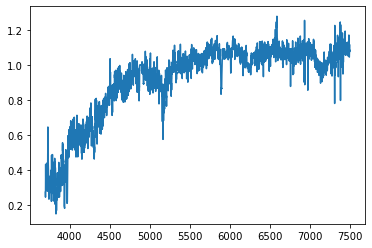

In [70]:
idx_spectrum = specobjid_to_idx(
    sdss_df.loc[specobjid_04[:, 1]].index[-100000],
    idx_specobjid
)
plt.plot(wave, spectra[idx_spectrum])

In [69]:
sdss_df.loc[specobjid_04[:, 1], "snMedian"].iloc[-100000]

21.42426

In [1]:
a = "023:12:07.4"
b = "3:13:07.3"
c = "-5:13:07.3"

In [5]:
x, y, z = [float(number) for number in c.split(":")]
x, y, z

(-5.0, 13.0, 7.3)